# Diagramas de Voronoi con información georeferenciada

In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
from pandas import DataFrame
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords

Leemos la info georeferenciada de los mercados. Primero como un dataframe y luego como un geodataframe.

In [2]:
df = pd.read_excel('mercados_vc.xlsx', index_col=0) 

In [3]:
mercados = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat)) ### Geodataframe

In [4]:
mercados.head()

,long,lat,nombre,geometry
0,-99.124184,19.426342,La Merced,POINT (-99.12418 19.42634)
1,-99.124755,19.422167,Sonora,POINT (-99.12476 19.42217)
2,-99.122846,19.408153,Jamaica,POINT (-99.12285 19.40815)
3,-99.114764,19.440071,Morelos,POINT (-99.11476 19.44007)
4,-99.072693,19.421361,Adolfo Lopez Mateos,POINT (-99.07269 19.42136)


Convertimos estos puntos en un sistema de coordenadas de referencia(CRS)

WGS84 Latitude/Longitude: "EPSG:4326"

In [5]:
mercados.crs = "EPSG:4326"

Importamos ahora los polígonos correspondientes a las alcaldías de la CDMX

In [6]:
alcaldias = gpd.read_file("alcaldias.shp")

Tomamos ahora el polígono correspondiente a la alcaldía Venustiano Carranza

In [7]:
v_carranza = alcaldias.drop([0,1,2,3,4,5,6,8,9,10,11,12,13,14,15],axis=0)

Vamos a graficar estos datos.

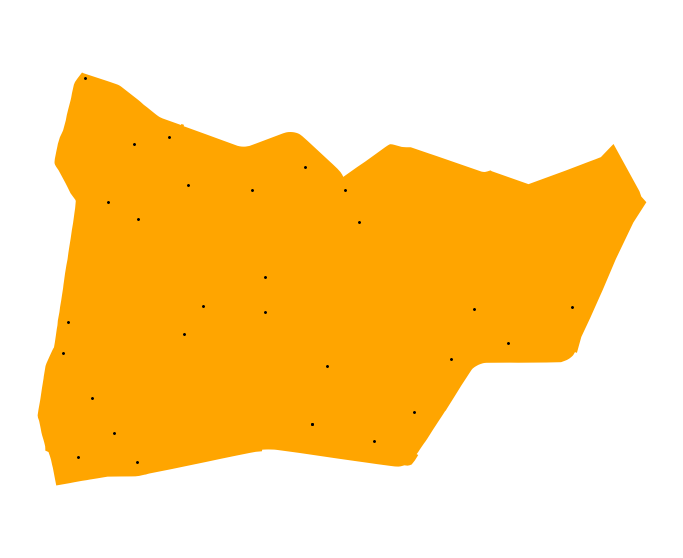

In [8]:
alcaldia = v_carranza
fig, ax = plt.subplots(figsize=(12, 10))
alcaldia.plot(ax=ax, color="orange")
mercados.plot(ax=ax, markersize=3.5, color="black")
ax.axis("off")
plt.axis('equal')
plt.show()

Ajustamos la información al sistema de coordenadas de referencia(CRS)

In [10]:
alcaldia = alcaldia.to_crs(epsg=3395)
gdf_proj = mercados.to_crs(alcaldia.crs)

Convertimos estos datos al formato que puede ser utilizado por la biblioteca Geovoronoi.

In [11]:
alcaldia_shape = cascaded_union(alcaldia.geometry)
coords = points_to_coords(gdf_proj.geometry)

Calculamos ahora las regiones de Voronoi

In [12]:
poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, alcaldia_shape)

Graficamos el diagrama

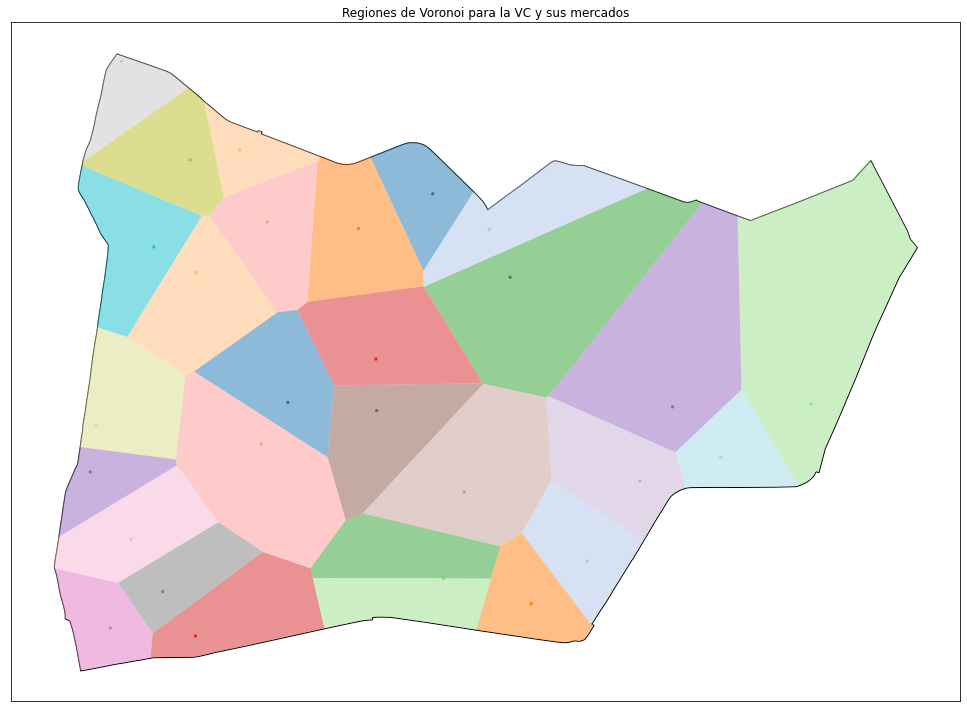

In [14]:
fig, ax = subplot_for_map(figsize=(14.5,10))
plot_voronoi_polys_with_points_in_area(ax, alcaldia_shape, poly_shapes, pts, poly_to_pt_assignments)
ax.set_title('Regiones de Voronoi para la VC y sus mercados')
plt.tight_layout()
plt.show()